# Decision Tree Classifier

### This classification algorithm is used to build a model from the historical data of patients, and their response to different medications. Then, model will use the trained decision tree to predict the class of an unknown patient, or to find a proper drug for a new patient.

### Step - 1: Import the Important Libraries

In [2]:
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree
import matplotlib.pyplot as plt

### About the Dataset:
#### Imagine that you are a medical researcher compiling data for a study. You have collected data about a set of patients, all of whom suffered from the same illness. During their course of treatment, each patient responded to one of 5 medications, Drug A, Drug B, Drug C, Drug X, and Drug Y.
#### Part of your job is to build a model to find out which drug might be appropriate for a future patient with the same illness. The features of this dataset are Age, Sex, Blood Pressure, and the Cholesterol of the patients, and the target is the drug that each patient responded to.
#### It is a sample of multiclass classifier, and you can use the training part of the dataset to build a decision tree, and then use it to predict the class of an unknown patient, or to prescribe a drug to a new patient.

### Step - 2: Load the Data

In [4]:
my_data = pd.read_csv('Data for Decision Tree.csv')
my_data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [6]:
my_data.size

1200

In [7]:
my_data.describe (include = 'all')

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
count,200.000000,200,200,200,200.000000,200
unique,NaN,2,3,2,NaN,5
top,NaN,M,HIGH,HIGH,NaN,drugY
freq,NaN,104,77,103,NaN,91
mean,44.315000,NaN,NaN,NaN,16.084485,NaN
std,16.544315,NaN,NaN,NaN,7.223956,NaN
min,15.000000,NaN,NaN,NaN,6.269000,NaN
25%,31.000000,NaN,NaN,NaN,10.445500,NaN
50%,45.000000,NaN,NaN,NaN,13.936500,NaN
75%,58.000000,NaN,NaN,NaN,19.380000,NaN


### Step - 3: Data Preprocessing

In [8]:
# Get the independent variables
X = my_data[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values
X[0:5]

array([[23, 'F', 'HIGH', 'HIGH', 25.355],
       [47, 'M', 'LOW', 'HIGH', 13.093],
       [47, 'M', 'LOW', 'HIGH', 10.114],
       [28, 'F', 'NORMAL', 'HIGH', 7.798],
       [61, 'F', 'LOW', 'HIGH', 18.043]], dtype=object)

In [9]:
# Some features in this dataset are categorical, such as Sex or BP. Unfortunately, Sklearn Decision Trees does not handle categorical variables. Convert these features to numerical values.
from sklearn import preprocessing
le_sex = preprocessing.LabelEncoder()
le_sex.fit(['F','M'])
X[:,1] = le_sex.transform(X[:,1]) 


le_BP = preprocessing.LabelEncoder()
le_BP.fit([ 'LOW', 'NORMAL', 'HIGH'])
X[:,2] = le_BP.transform(X[:,2])


le_Chol = preprocessing.LabelEncoder()
le_Chol.fit([ 'NORMAL', 'HIGH'])
X[:,3] = le_Chol.transform(X[:,3]) 

X[0:5]

array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.114],
       [28, 0, 2, 0, 7.798],
       [61, 0, 1, 0, 18.043]], dtype=object)

In [11]:
# Get the dependent variable
y = my_data["Drug"]
y[0:5]

0    drugY
1    drugC
2    drugC
3    drugX
4    drugY
Name: Drug, dtype: object

### Step - 4: Set Decision Tree

In [12]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 3)
print('Shape of X-Train Set: ', X_train.shape)
print('Shape of X-Test Set: ', X_test.shape)
print('Shape of y-Train Set: ', y_train.shape)
print('Shape of y-Test Set: ', X_test.shape)

Shape of X-Train Set:  (140, 5)
Shape of X-Test Set:  (60, 5)
Shape of y-Train Set:  (140,)
Shape of y-Test Set:  (60, 5)


### Step - 5: Setup the Model

In [16]:
# Specify criterion = "entropy"
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
drugTree

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [18]:
drugTree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

### Step - 6: Prediction

In [19]:
predTree = drugTree.predict(X_test)

In [20]:
print (predTree [0:5])
print (y_test [0:5])

['drugY' 'drugX' 'drugX' 'drugX' 'drugX']
40     drugY
51     drugX
139    drugX
197    drugX
170    drugX
Name: Drug, dtype: object


### Step - 7: Model Evaluation

In [22]:
from sklearn import metrics
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))

DecisionTrees's Accuracy:  0.9833333333333333


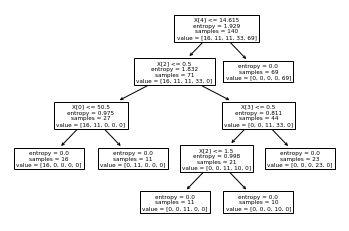

In [29]:
tree.plot_tree(drugTree)
plt.show()

In [30]:
# Specify criterion = "entropy"
drugTree_l = DecisionTreeClassifier(criterion="log_loss", max_depth = 4)
drugTree_l

DecisionTreeClassifier(criterion='log_loss', max_depth=4)

In [31]:
drugTree_l.fit(X_train,y_train)

DecisionTreeClassifier(criterion='log_loss', max_depth=4)

In [32]:
predTree_l = drugTree_l.predict(X_test)

In [33]:
print (predTree_l [0:5])
print (y_test [0:5])

['drugY' 'drugX' 'drugX' 'drugX' 'drugX']
40     drugY
51     drugX
139    drugX
197    drugX
170    drugX
Name: Drug, dtype: object


In [34]:
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree_l))

DecisionTrees's Accuracy:  0.9833333333333333


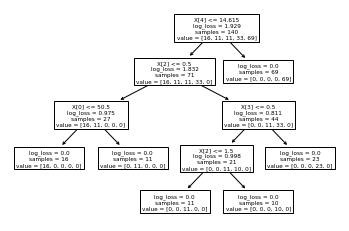

In [35]:
tree.plot_tree(drugTree_l)
plt.show()

In [36]:
# Using the "log_loss" criterion, same accuracy is achieved.